<a href="https://colab.research.google.com/github/IasyaSholihin/Project_AmikomS2/blob/main/Tugas_AI/Uas_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
base_dir = '/content/drive/My Drive/Data_Uang'
!ls "/content/drive/My Drive/Data_Uang"

bahan  latih  validasi


In [7]:
import os
# Menentukan Direktori

# Tentukan nama direktori untuk latihan dan validasi
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Buat direktori latihan dan validasi beserta sub-direktorinya (seratus dan limapuluh)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

train_seratus = os.path.join(train_dir, 'seratus')
train_limapuluh = os.path.join(train_dir, 'limapuluh')
validation_seratus = os.path.join(validation_dir, 'seratus')
validation_limapuluh = os.path.join(validation_dir, 'limapuluh')

os.makedirs(train_seratus, exist_ok=True)
os.makedirs(train_limapuluh, exist_ok=True)
os.makedirs(validation_seratus, exist_ok=True)
os.makedirs(validation_limapuluh, exist_ok=True)

# Cek apakah direktori telah berhasil dibuat
print("Direktori latihan dan validasi telah dibuat:")
print("Train Directory:", train_dir)
print("Validation Directory:", validation_dir)

Direktori latihan dan validasi telah dibuat:
Train Directory: /content/drive/My Drive/Data_Uang/train
Validation Directory: /content/drive/My Drive/Data_Uang/validation


In [8]:
import shutil

# Mendefinisikan path ke folder 'Data_Uang'
data_uang_dir = base_dir   # Ganti dengan path yang sesuai

# Memeriksa apakah folder 'Data_Uang' ada
if not os.path.exists(data_uang_dir):
    print("Folder 'Data_Uang' tidak ditemukan.")
    exit()

# Mendefinisikan path untuk folder 'bahan'
bahan_dir = os.path.join(data_uang_dir, 'bahan')

# Memeriksa apakah folder 'bahan' ada di dalam folder 'Data_Uang'
if not os.path.exists(bahan_dir):
    print("Folder 'bahan' tidak ditemukan di dalam folder 'Data_Uang'.")
    exit()

# Mendefinisikan path untuk folder 'seratus' dan 'limapuluh' di dalam folder 'bahan'
seratus_dir = os.path.join(bahan_dir, 'seratus')
limapuluh_dir = os.path.join(bahan_dir, 'limapuluh')

# Memeriksa apakah folder 'seratus' dan 'limapuluh' ada di dalam folder 'bahan'
if not os.path.exists(seratus_dir) or not os.path.exists(limapuluh_dir):
    print("Folder 'seratus' atau 'limapuluh' tidak ditemukan di dalam folder 'bahan'.")
    exit()

# Menyalin file dari 'seratus' ke direktori train_seratus dan validation_seratus
for file_name in os.listdir(seratus_dir):
    source_file = os.path.join(seratus_dir, file_name)
    shutil.copy(source_file, os.path.join(train_seratus, file_name))
    shutil.copy(source_file, os.path.join(validation_seratus, file_name))

# Menyalin file dari 'limapuluh' ke direktori train_limapuluh dan validation_limapuluh
for file_name in os.listdir(limapuluh_dir):
    source_file = os.path.join(limapuluh_dir, file_name)
    shutil.copy(source_file, os.path.join(train_limapuluh, file_name))
    shutil.copy(source_file, os.path.join(validation_limapuluh, file_name))

print("Proses penyalinan selesai.")


Proses penyalinan selesai.


In [ ]:

# Memeriksa apakah folder train_seratus, train_limapuluh, validation_seratus, dan validation_limapuluh kosong
def check_directory(directory):
    files = os.listdir(directory)
    if len(files) == 0:
        print(f"Folder {directory} kosong.")
    else:
        print(f"Folder {directory} tidak kosong. Berisi file:")
        for file in files:
            print(file)

check_directory(train_seratus)
check_directory(train_limapuluh)
check_directory(validation_seratus)
check_directory(validation_limapuluh)


Menyiapkan Dataset

In [17]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

  # Jumlah Pembagian data traning dan testing
  train_ratio = 0.9

# Pembagian Traning dan Validasi
# Traning 100k
  source_00 = seratus_dir
  train_00 = train_seratus
  val_00 = validation_seratus
  train_val_split(source_00, train_00, val_00, train_ratio)

#Traning 50K
  source_01 = limapuluh_dir
  train_01 = train_limapuluh
  val_01 = validation_limapuluh
  train_val_split(source_01, train_01, val_01, train_ratio)


In [18]:
print('Jumlah All seratus :', len(os.listdir(seratus_dir)))
print('Jumlah Train seratus :', len(os.listdir(train_seratus)))
print('Jumlah Val seratus :', len(os.listdir(validation_seratus)))

Jumlah All seratus : 100
Jumlah Train seratus : 100
Jumlah Val seratus : 100


In [19]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 30,
                horizontal_flip = True,
                shear_range = 0.3,
                fill_mode = 'nearest',
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 30,
                horizontal_flip = True,
                shear_range = 0.3,
                fill_mode = 'nearest',
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                zoom_range = 0.1
)

In [21]:
train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size = (150, 150),
      batch_size = 10,
      class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
      validation_dir,
      target_size = (150, 150),
      batch_size = 10,
      class_mode = 'categorical'
)

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [29]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\n Akurasi Mencapai 99%')
      self.model.stop_traning = True

checkpoint = myCallback()

Model CNN

In [30]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(200, activation = 'relu'),
            tf.keras.layers.Dropout(0.3,seed=112),
            tf.keras.layers.Dense(500, activation = 'relu'),
            tf.keras.layers.Dropout(0.5,seed=112),
            tf.keras.layers.Dense(2, activation = 'sigmoid'),
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
history = model.fit(
            train_generator,
            steps_per_epoch = 6,
            epochs = 25,
            validation_data = val_generator,
            validation_steps = 1,
            verbose = 1,
            callbacks=[checkpoint]
            )



Epoch 1/25
1/1 [==============================] - 3s 3s/step - loss: 0.7419 - accuracy: 0.2000 - val_loss: 0.5944 - val_accuracy: 0.7000
Epoch 2/25
1/1 [==============================] - 1s 1s/step - loss: 0.5689 - accuracy: 0.6000 - val_loss: 0.8162 - val_accuracy: 0.3000
Epoch 3/25
1/1 [==============================] - 1s 795ms/step - loss: 0.5950 - accuracy: 0.7000 - val_loss: 0.7135 - val_accuracy: 0.4000
Epoch 4/25
1/1 [==============================] - 1s 811ms/step - loss: 0.9215 - accuracy: 0.5000 - val_loss: 0.6404 - val_accuracy: 0.4000
Epoch 5/25
1/1 [==============================] - 1s 825ms/step - loss: 0.7400 - accuracy: 0.6000 - val_loss: 0.6760 - val_accuracy: 0.4000
Epoch 6/25
1/1 [==============================] - 1s 1s/step - loss: 0.8450 - accuracy: 0.4000 - val_loss: 0.6453 - val_accuracy: 0.6000
Epoch 7/25
1/1 [==============================] - 1s 1s/step - loss: 0.7502 - accuracy: 0.6000 - val_loss: 0.5720 - val_accuracy: 0.9000
Epoch 8/25
1/1 [================

Tingkat Akurasi Dan Loos Model

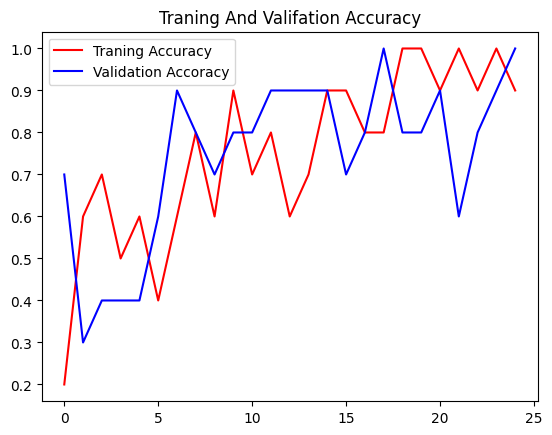

In [38]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_los = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Traning Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accoracy')
plt.title('Traning And Valifation Accuracy')
plt.legend(loc = 'best')
plt.show()

Coba Kalsifikasi

Saving 1.jpeg to 1.jpeg
1/1 [==============================] - 0s 43ms/step
1.jpeg
 This image belongs to class seratus


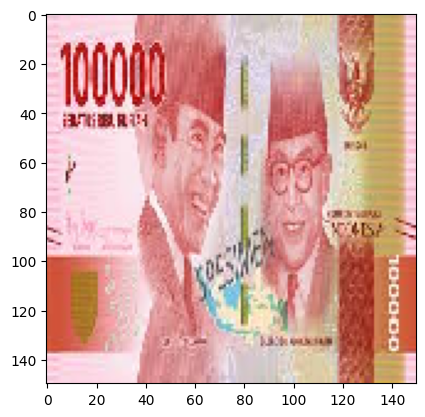

In [48]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt  # Anda harus mengimpor pyplot

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn

    # Prediksi Gambar
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=100)

    print(fn)

    class_list = os.listdir(train_dir)

    for j in range(42):
        if classes[0][j] == 1.:
            print(' This image belongs to class', class_list[j-1])
            break
